In [36]:
filecenter_A384 = './20240317/assembled_plates/A384well_Scan_0317_4XAPO_Kinetix_Bf.mat';
load(filecenter_A384,'four_corner_center0');
well_center_xy_array_src = four_corner_center0;
xy_translation=[0, 0];
well_center_xy_array=ceil((well_center_xy_array_src + xy_translation));

In [28]:
A384_well_list = [1:384];
exclude_well_list = [1:24 25:24:384 48:24:384 362:383];
picked_well_list = [];
for i=A384_well_list
    flag = 0;
    for j=exclude
        if i==j
            flag = 1;
            break;
        end
    end
    if flag==0
        picked_well_list = [picked_well_list i];
    end
end

In [46]:
%?
load ('Kinitex_25_A384_10XAPO.mat','c','index_x','index_y');
view_num_per_well=length(index_x);
c(c==825)=825;
c(c==-825)=-825;
view_offset = c;

In [50]:
well_num=length(picked_well_list);
% generate positions(view) for each well
position_list = [];
for well_count=1:well_num
    well_idx=picked_well_list(well_count);
    for view_idx=1:view_num_per_well
            pos_x = well_center_xy_array(well_idx, 1) + view_offset(view_idx, 1);
            pos_y = well_center_xy_array(well_idx, 2) + view_offset(view_idx, 2);
  
            % metainfo
            position = struct();
            position.id = (well_idx-1)*view_num_per_well + view_idx;
            position.x_um = int32(pos_x);
            position.y_um = int32(pos_y);
            position.z_um = 5400; % reference value for A384
            position.pfs = 0; % 0 to disable
            position.name = sprintf("well%d_%d", well_idx, view_idx);
            position.well = well_idx;
            position.ch = ["test"];
            position_list = [position_list; position];
    end
end

% confirm with for plates and objectives
% correction for xy stage range
% clearence for 10XAPO
Ymin_um=-37500; Ymax_um=37500;
Xmin_um=-57000; Xmax_um=57000;
position_num = length(position_list);
for idx=1:position_num
    position = position_list(idx);
    if position.y_um>Ymax_um
        position.y_um = Ymax_um;
    end
    if position.y_um<Ymin_um
        position.y_um = Ymin_um;
    end
    if position.x_um>Xmax_um
        position.x_um = Xmax_um;
    end
    if position.x_um<Xmin_um
        position.x_um = Xmin_um;
    end
end

 % Channel setting
 % Trigger command: 
 % TRG1->385nm, TRG2->475nm, TRG3->550nm, TRG4->621nm, TRG0->ALL
 % em: '1-Empty', '2-DAPI', '3-FITC', '4-Texas Red','5-89000','6-Empty';
 chsetup(1).name='BF';
 chsetup(1).ex_port='';
 chsetup(1).ex_wavelength_nm='';
 chsetup(1).em='1-Empty'; 
 chsetup(1).exposure=100;
 
 chsetup(2).name='BFP';
 chsetup(2).ex_port='1';
 chsetup(2).ex_wavelength_nm=385;
 chsetup(2).em='2-DAPI';
 chsetup(2).exposure=200;
 
 chsetup(3).name='GFP';
 chsetup(3).ex_port='2';
 chsetup(3).ex_wavelength_nm=475;
 chsetup(3).em='3-FITC';
 chsetup(3).exposure=100;
 
 chsetup(4).name='RFP';
 chsetup(4).ex_port='3';
 chsetup(4).ex_wavelength_nm=550;
 chsetup(4).em='4-Texas Red';
 chsetup(4).exposure=100;
 
 chsetup(5).name='4';
 chsetup(5).em='';
 chsetup(5).ex_port='4';
 chsetup(5).ex_wavelength_nm=621;
 chsetup(5).exposure=100;
 
 chsetup(6).em='6-Empty';

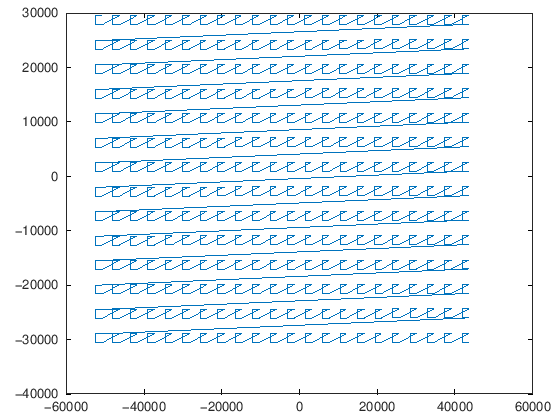

In [55]:
% plot path
position_num=length(position_list);
xy_um = zeros(position_num, 2);
for idx=1:position_num
    xy_um(idx, 1) = position_list(idx).x_um;
    xy_um(idx, 2) = position_list(idx).y_um;
end
plot(xy_um(:, 1), xy_um(:, 2))

In [12]:
output_info.sample_name = "plate4-sto-mcherry-normal-medium";
%output_info.sample_name = "plate1-sto-gfp-conditioned-medium";
%output_info.sample_name = "plate2-sto-gfp-normal-medium";
%output_info.sample_name = "plate3-sto-mcherry-conditioned-medium";
%output_info.data_dir = '//data.qblab.science/datahub/';
output_info.project_dir = "";
output_info.data_dir = ['E:/XJF/20240424/' output_info.sample_name];
output_info.well_plate.npw = 4;
output_info.well_plate.view = view_offset;
output_info.well_plate.nwell = well_num;
output_info.well_plate.well_center_xy_array = well_center_array;
output_info.well_plate.well_list = filtered_well;
output_info.chsetup = chsetup;
output_info.chsetting = '';
output_info.exposure_sequence = [200];
output_info.channel_sequence = [3];
output_info.position_list = position_list;
W = 3200; H = 3200;
W1=2720; H1=2720; Woffset=0.5*(W-W1)+1;Hoffset=0.5*(H-H1)+1;

output_info.roi=[0, 0, W, H];#[x0, y0, width, height]
output_json_file = fopen("plate4_20240424_rapid_scan_plate_A384_10x.json", 'w');
output_json = jsonencode(output_info, "PrettyPrint", true); # PrettyPrint only avaliable after matlab2021
fprintf(output_json_file, output_json);
fclose(output_json_file)

ans = 0
